In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [3]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.gif')]

In [4]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    print ("Maximum difference was %d" % (max_diff))
    
    return ela_im

In [5]:
fakes_datasets_filename = sorted(get_imlist('datasets/Medieval2015_DevSet_Images/fakes/'))
reals_datasets_filename = sorted(get_imlist('datasets/Medieval2015_DevSet_Images/reals'))

# Starts Here

In [24]:
fake_imfile_list = []
for filename in fakes_datasets_filename:
    fake_imfile_list.append(array(convert_to_ela_image(filename, 90).resize((100, 100))).flatten())

Maximum difference was 21
Maximum difference was 14
Maximum difference was 17
Maximum difference was 5
Maximum difference was 46
Maximum difference was 7
Maximum difference was 36
Maximum difference was 5
Maximum difference was 23
Maximum difference was 5
Maximum difference was 34
Maximum difference was 5
Maximum difference was 37
Maximum difference was 9
Maximum difference was 42
Maximum difference was 17
Maximum difference was 12
Maximum difference was 3
Maximum difference was 39
Maximum difference was 5
Maximum difference was 12
Maximum difference was 6
Maximum difference was 17
Maximum difference was 7
Maximum difference was 73
Maximum difference was 11
Maximum difference was 14
Maximum difference was 7
Maximum difference was 31
Maximum difference was 8
Maximum difference was 52
Maximum difference was 17
Maximum difference was 27
Maximum difference was 12
Maximum difference was 16
Maximum difference was 8
Maximum difference was 37
Maximum difference was 7
Maximum difference was 119

Maximum difference was 30
Maximum difference was 11
Maximum difference was 20
Maximum difference was 3
Maximum difference was 133
Maximum difference was 7
Maximum difference was 10
Maximum difference was 6
Maximum difference was 14
Maximum difference was 6
Maximum difference was 27
Maximum difference was 11
Maximum difference was 37
Maximum difference was 15
Maximum difference was 7
Maximum difference was 3
Maximum difference was 17
Maximum difference was 4
Maximum difference was 147
Maximum difference was 8
Maximum difference was 27
Maximum difference was 6
Maximum difference was 134
Maximum difference was 7
Maximum difference was 137
Maximum difference was 7
Maximum difference was 34
Maximum difference was 9
Maximum difference was 12
Maximum difference was 3
Maximum difference was 9
Maximum difference was 4
Maximum difference was 11
Maximum difference was 8
Maximum difference was 18
Maximum difference was 6
Maximum difference was 10
Maximum difference was 5


Maximum difference was 23
Maximum difference was 23
Maximum difference was 7
Maximum difference was 4
Maximum difference was 35
Maximum difference was 35
Maximum difference was 14
Maximum difference was 7
Maximum difference was 12
Maximum difference was 12
Maximum difference was 6
Maximum difference was 5
Maximum difference was 12
Maximum difference was 12
Maximum difference was 6
Maximum difference was 4
Maximum difference was 4
Maximum difference was 4
Maximum difference was 2
Maximum difference was 2
Maximum difference was 6
Maximum difference was 6
Maximum difference was 3
Maximum difference was 1
Maximum difference was 4
Maximum difference was 4
Maximum difference was 2
Maximum difference was 1
Maximum difference was 21
Maximum difference was 21
Maximum difference was 6
Maximum difference was 7
Maximum difference was 10
Maximum difference was 10
Maximum difference was 4
Maximum difference was 2
Maximum difference was 17
Maximum difference was 17
Maximum difference was 5
Maximum di

Maximum difference was 10
Maximum difference was 10
Maximum difference was 3
Maximum difference was 2
Maximum difference was 16
Maximum difference was 16
Maximum difference was 8
Maximum difference was 6
Maximum difference was 10
Maximum difference was 10
Maximum difference was 3
Maximum difference was 3
Maximum difference was 20
Maximum difference was 20
Maximum difference was 3
Maximum difference was 4
Maximum difference was 43
Maximum difference was 43
Maximum difference was 5
Maximum difference was 3
Maximum difference was 10
Maximum difference was 10
Maximum difference was 5
Maximum difference was 4
Maximum difference was 42
Maximum difference was 42
Maximum difference was 22
Maximum difference was 6
Maximum difference was 14
Maximum difference was 14
Maximum difference was 9
Maximum difference was 9
Maximum difference was 15
Maximum difference was 15
Maximum difference was 3
Maximum difference was 4
Maximum difference was 6
Maximum difference was 6
Maximum difference was 2
Maximu

Maximum difference was 2
Maximum difference was 8
Maximum difference was 8
Maximum difference was 1
Maximum difference was 2
Maximum difference was 20
Maximum difference was 20
Maximum difference was 4
Maximum difference was 4
Maximum difference was 42
Maximum difference was 42
Maximum difference was 6
Maximum difference was 4
Maximum difference was 24
Maximum difference was 24
Maximum difference was 1
Maximum difference was 1
Maximum difference was 18
Maximum difference was 18
Maximum difference was 11
Maximum difference was 8
Maximum difference was 117
Maximum difference was 117
Maximum difference was 21
Maximum difference was 14
Maximum difference was 7
Maximum difference was 7
Maximum difference was 2
Maximum difference was 1
Maximum difference was 5
Maximum difference was 5
Maximum difference was 4
Maximum difference was 4
Maximum difference was 11
Maximum difference was 11
Maximum difference was 2
Maximum difference was 2
Maximum difference was 56
Maximum difference was 56
Maximu

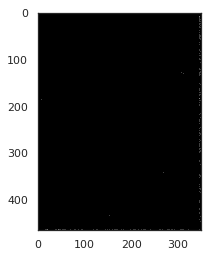

In [7]:
real_imfile_list = []
for filename in reals_datasets_filename:
    real_imfile_list.append(array(convert_to_ela_image(filename, 90).resize((100, 100))).flatten())

In [8]:
len(fake_imfile_list)

366

In [9]:
len(real_imfile_list)

352

# Lanjut

In [10]:
for index, fake_imfile in enumerate(fake_imfile_list):
    fake_imfile_list[index] = array(fake_imfile) / 255.0

In [11]:
for index, real_imfile in enumerate(real_imfile_list):
    real_imfile_list[index] = array(real_imfile) / 255.0

# Change to Data Frame

## Extend and Delete

In [12]:
X = []
X.extend(fake_imfile_list)
X.extend(real_imfile_list)

In [13]:
len(X)

718

In [14]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.047059,0.047059,0.000000,0.000000,0.000000,0.000000,0.047059,0.047059,0.047059,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.058824,0.058824,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.019608,0.019608,0.000000,0.000000,0.043137,0.019608,0.000000,0.000000,0.043137,0.019608,...,0.062745,0.019608,0.019608,0.019608,0.000000,0.000000,0.000000,0.105882,0.062745,0.043137
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.141176,0.000000,0.000000,0.141176,0.141176,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.027451,0.027451,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.043137,0.043137,0.043137,0.043137,0.129412,0.000000,0.043137,0.043137,0.043137,0.043137,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Add Y

In [15]:
Y = []
for i in range(len(fake_imfile_list)):
    Y.append(1)
for i in range(len(real_imfile_list)):
    Y.append(0)

In [16]:
Y = to_categorical(Y, num_classes=2)

In [17]:
Y.shape

(718, 2)

# Reshape X

In [18]:
X = X.values.reshape(-1, 100, 100, 3)

In [19]:
X.shape

(718, 100, 100, 3)

## Train Test Split

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [21]:
X_val

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

# Model

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (100,100,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))

In [23]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [24]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [26]:
epochs = 500
batch_size = 100

In [27]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 646 samples, validate on 72 samples
Epoch 1/500
 - 5s - loss: 0.7176 - acc: 0.5093 - val_loss: 0.8227 - val_acc: 0.4583
Epoch 2/500
 - 2s - loss: 0.7111 - acc: 0.5186 - val_loss: 0.6965 - val_acc: 0.4583
Epoch 3/500
 - 2s - loss: 0.6934 - acc: 0.5093 - val_loss: 0.6974 - val_acc: 0.4583
Epoch 4/500
 - 2s - loss: 0.6966 - acc: 0.5046 - val_loss: 0.6950 - val_acc: 0.4583
Epoch 5/500
 - 2s - loss: 0.6924 - acc: 0.5186 - val_loss: 0.6935 - val_acc: 0.4583
Epoch 6/500
 - 2s - loss: 0.7189 - acc: 0.5124 - val_loss: 0.6939 - val_acc: 0.4583
Epoch 7/500
 - 2s - loss: 0.6925 - acc: 0.5217 - val_loss: 0.6886 - val_acc: 0.4722
Epoch 8/500
 - 2s - loss: 0.6837 - acc: 0.5542 - val_loss: 0.6752 - val_acc: 0.6944
Epoch 9/500
 - 2s - loss: 0.6927 - acc: 0.5526 - val_loss: 0.6889 - val_acc: 0.5000
Epoch 10/500
 - 2s - loss: 0.6721 - acc: 0.6037 - val_loss: 0.6879 - val_acc: 0.4861
Epoch 11/500
 - 2s - loss: 0.6583 - acc: 0.6176 - val_loss: 0.6722 - val_acc: 0.5694
Epoch 12/500
 - 2s - loss: 0.

Epoch 97/500
 - 2s - loss: 0.0079 - acc: 0.9969 - val_loss: 4.7634 - val_acc: 0.5694
Epoch 98/500
 - 2s - loss: 0.0091 - acc: 0.9969 - val_loss: 4.9052 - val_acc: 0.5556
Epoch 99/500
 - 2s - loss: 0.0203 - acc: 0.9923 - val_loss: 4.6568 - val_acc: 0.5694
Epoch 100/500
 - 2s - loss: 0.0089 - acc: 0.9969 - val_loss: 4.6412 - val_acc: 0.5556
Epoch 101/500
 - 2s - loss: 0.0092 - acc: 0.9969 - val_loss: 4.6377 - val_acc: 0.5417
Epoch 102/500
 - 2s - loss: 0.0079 - acc: 0.9969 - val_loss: 4.6130 - val_acc: 0.5556
Epoch 103/500
 - 2s - loss: 0.0389 - acc: 0.9876 - val_loss: 4.1922 - val_acc: 0.5278
Epoch 104/500
 - 2s - loss: 0.0121 - acc: 0.9954 - val_loss: 4.2650 - val_acc: 0.5833
Epoch 105/500
 - 2s - loss: 0.0088 - acc: 0.9969 - val_loss: 4.3185 - val_acc: 0.5556
Epoch 106/500
 - 2s - loss: 0.0087 - acc: 0.9969 - val_loss: 4.5135 - val_acc: 0.5833
Epoch 107/500
 - 2s - loss: 0.0094 - acc: 0.9969 - val_loss: 4.4301 - val_acc: 0.5972
Epoch 108/500
 - 2s - loss: 0.0076 - acc: 0.9969 - val_lo

KeyboardInterrupt: 